## 資料預處理

In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
filepath = "data/titanic3.xls"
all_df = pd.read_excel(filepath)

In [3]:
cols = ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
all_df = all_df[cols]

In [4]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [5]:
print('total', len(all_df),
      'tain', len(train_df),
      'test', len(test_df))

total 1309 tain 1034 test 275


In [6]:
def PreprocessData(raw_df):
    df = raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female': 0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df, columns=["embarked"])
    
    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaleFeatures = minmax_scale.fit_transform(Features)
    
    return scaleFeatures, Label

In [7]:
train_Features, train_Label = PreprocessData(train_df)
test_Features, test_Label = PreprocessData(test_df)

## 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

/home/chocola/anaconda3/envs/tfcpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=40, 
                input_dim=9,
                kernel_initializer='uniform',
                activation='relu'))

In [11]:
model.add(Dense(units=30,
                kernel_initializer='uniform',
                activation='relu'))

In [12]:
model.add(Dense(units=1,
                kernel_initializer='uniform',
                activation='sigmoid'))

## 開始訓練

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [14]:
train_history = model.fit(x=train_Features,
                          y=train_Label,
                          validation_split=0.1,
                          epochs=30,
                          batch_size=30,
                          verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 0s - loss: 0.6900 - acc: 0.5774 - val_loss: 0.6705 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6674 - acc: 0.5978 - val_loss: 0.5898 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6093 - acc: 0.6677 - val_loss: 0.4940 - val_acc: 0.8173
Epoch 4/30
 - 0s - loss: 0.5454 - acc: 0.7634 - val_loss: 0.4623 - val_acc: 0.7596
Epoch 5/30
 - 0s - loss: 0.5067 - acc: 0.7613 - val_loss: 0.4548 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.4914 - acc: 0.7645 - val_loss: 0.4404 - val_acc: 0.7788
Epoch 7/30
 - 0s - loss: 0.4825 - acc: 0.7591 - val_loss: 0.4422 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.4790 - acc: 0.7591 - val_loss: 0.4356 - val_acc: 0.7981
Epoch 9/30
 - 0s - loss: 0.4730 - acc: 0.7624 - val_loss: 0.4276 - val_acc: 0.7885
Epoch 10/30
 - 0s - loss: 0.4697 - acc: 0.7785 - val_loss: 0.4254 - val_acc: 0.8077
Epoch 11/30
 - 0s - loss: 0.4656 - acc: 0.7624 - val_loss: 0.4229 - val_acc: 0.8173
Epoch 12/30
 - 0s - loss: 0.4639 - acc:

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,
                       train,
                       validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

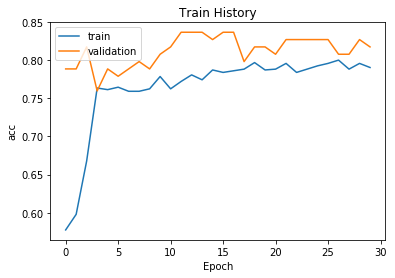

In [16]:
show_train_history(train_history, 'acc', 'val_acc')

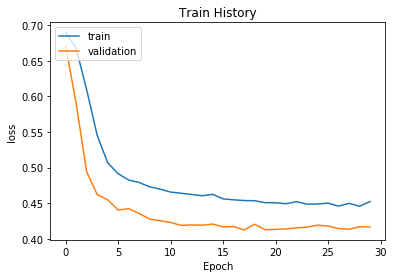

In [17]:
show_train_history(train_history, 'loss', 'val_loss')

## 評估模型準確率

In [18]:
scores = model.evaluate(x=test_Features,
                       y=test_Label)

275/275 [==============================] - 0s 54us/step


In [19]:
scores[1]

0.8109090913425793

## 加入鐵達尼號電影Jack與Rose的資料

In [20]:
Jack = pd.Series([0, 'Jack', 3, 'male', 23, 1, 0, 5.0000, 'S'])
Rose = pd.Series([1, 'Rose', 1, 'female', 20, 1, 0, 100.0000, 'S'])

In [21]:
JR_df = pd.DataFrame([list(Jack), list(Rose)],
                     columns=['survived', 'name', 'pclass', 'sex',
                     'age', 'sibsp', 'parch', 'fare', 'embarked'])

In [22]:
all_df = pd.concat([all_df, JR_df])

In [23]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


## 進行預測

In [24]:
all_Features, Label = PreprocessData(all_df)

In [25]:
all_probability = model.predict(all_Features)

In [26]:
all_probability[:10]

array([[0.9780044 ],
       [0.6204991 ],
       [0.9741165 ],
       [0.41333032],
       [0.9727285 ],
       [0.27530646],
       [0.9492033 ],
       [0.32909292],
       [0.9479107 ],
       [0.29026836]], dtype=float32)

In [27]:
pd = all_df
pd.insert(len(all_df.columns),
          'probability', 
          all_probability)

In [28]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.149249
1,1,Rose,1,female,20.0,1,0,100.0,S,0.971164


In [29]:
pd[(pd['survived'] == 0) & (pd['probability'] > 0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.974117
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.972728
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.978519
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.976181
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.962650


## 找出鐵達尼號背後感人的故事

In [30]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.978004
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.620499
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.974117
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.413330
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.972728
